In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns

/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [27]:
fig_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
# fig_format = 'png'
fig_format = 'pdf'
sc.set_figure_params(dpi_save=300,format=fig_format)
rcParams['figure.figsize'] = 5,4

sc.settings.figdir = fig_folder

In [2]:
myfolder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/neuroseq_notebooks/"

In [3]:
file_df = pd.read_csv(myfolder+'/file_tracking.tsv', sep='\t', index_col=0)

file_df

,type,time_point,description,path
label,,,,
all_sample_h5,scanpy h5 file,all,Scanpy file with subsample of cells from all t...,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_h5,scanpy h5 file,D11,scanpy file with all D11 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_h5,scanpy h5 file,D30,scanpy file with all D30 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_h5,scanpy h5 file,D52,scanpy file with all D52 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_cell_fractions,tsv,D11,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_cell_fractions,tsv,D30,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_cell_fractions,tsv,D52,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_efficiency,tsv,D52,differentiation efficiency for each cell line,/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_trajectories,tsv,all,"all differentiation trajectories, restricted t...",/nfs/leia/research/stegle/dseaton/hipsci/singl...


In [4]:
file = file_df.loc['all_sample_h5','path']
adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [5]:
adatafull.obs['celltype_timepoint'] = (adatafull.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

In [6]:
old_to_new = dict(
    DA_D52 = 'DA_D52',
    Astro_D30 = 'FPP_D30',
    DA_D30 = 'DA_D30',
    P_FPP_D11 = 'P_FPP_D11', 
    FPP_D52 = 'FPP_D52',
    Sert_D52 = 'Sert_D52',
    FPP_D11 = 'FPP_D11', 
    NB_D11 = 'NB_D11', 
    CHem_D30 = 'U_Neur1_D30', 
    P_FPP_D30 = 'P_FPP_D30',
    Epen1_D52 = 'Epen1_D52', 
    Astro_D52 = 'Astro_D52', 
    CHem_D52 = 'U_Neur1_D52', 
    Epen1_D30 = 'Epen1_D30', 
    P_FPP_D52 = 'P_FPP_D52',
    unknown_D30 = 'U_Neur2_D30', 
    Sert_D30 = 'Sert_D30', 
    Epen2_D52 = 'Epen2_D52', 
    unknown_D52 = 'U_Neur3_D52',
    P_Sert_D52 = 'P_Sert_D52'
)
adatafull.obs['celltype_timepoint_new'] = (
    adatafull.obs['celltype_timepoint']
    .map(old_to_new)
    .astype('category')
)

In [7]:
old_to_new = dict(
    DA_D52 = 'DA',
    FPP_D30 = 'FPP',
    DA_D30 = 'DA',
    P_FPP_D11 = 'P_FPP', 
    FPP_D52 = 'FPP',
    Sert_D52 = 'Sert',
    FPP_D11 = 'FPP', 
    NB_D11 = 'NB', 
    U_Neur1_D30 = 'U_Neur1', 
    P_FPP_D30 = 'P_FPP',
    Epen1_D52 = 'Epen1', 
    Astro_D52 = 'Astro', 
    U_Neur1_D52 = 'U_Neur1', 
    Epen1_D30 = 'Epen1', 
    P_FPP_D52 = 'P_FPP',
    U_Neur2_D30 = 'U_Neur2', 
    Sert_D30 = 'Sert', 
    Epen2_D52 = 'Epen2', 
    U_Neur3_D52 = 'U_Neur3',
    P_Sert_D52 = 'P_Sert'
)
adatafull.obs['celltype_new'] = (
    adatafull.obs['celltype_timepoint_new']
    .map(old_to_new)
    .astype('category')
)

In [8]:
# subsample
fraction = 1
adata = sc.pp.subsample(adatafull, fraction, copy=True)

In [20]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

In [21]:
old_to_new = dict(
    DA_D52 = 'DA_D52',
    Astro_D30 = 'FPP_D30',
    DA_D30 = 'DA_D30',
    P_FPP_D11 = 'P_FPP_D11', 
    FPP_D52 = 'FPP_D52',
    Sert_D52 = 'Sert_D52',
    FPP_D11 = 'FPP_D11', 
    NB_D11 = 'NB_D11', 
    CHem_D30 = 'U_Neur1_D30', 
    P_FPP_D30 = 'P_FPP_D30',
    Epen1_D52 = 'Epen1_D52', 
    Astro_D52 = 'Astro_D52', 
    CHem_D52 = 'U_Neur1_D52', 
    Epen1_D30 = 'Epen1_D30', 
    P_FPP_D52 = 'P_FPP_D52',
    unknown_D30 = 'U_Neur2_D30', 
    Sert_D30 = 'Sert_D30', 
    Epen2_D52 = 'Epen2_D52', 
    unknown_D52 = 'U_Neur3_D52',
    P_Sert_D52 = 'P_Sert_D52'
)
adata.obs['celltype_timepoint_new'] = (
    adata.obs['celltype_timepoint']
    .map(old_to_new)
    .astype('category')
)

In [22]:
# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","NB","Astro", "Epen1","Epen2","Sert","P_Sert","DA","U_Neur1","U_Neur2","U_Neur3"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]


cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint_new'] = adata.obs['celltype_timepoint_new'].astype(cat_type)

In [23]:
Proliferating = ['MKI67', 'TOP2A', 'KIAA1524']
Neural_Prog = ['LIX1', 'RAX', 'NR2F1', 'NES']
FP_prog = ['ZEB2', 'DMBX1','HMGA1', 'HMGB2']
Glia = ['TNC', 'SOX2', 'CDH2', 'HES1']
FP = ['LMX1A', 'FOXA2']
Astrocytes = ['S100B', 'AQP4', 'GFAP', 'SLC1A3','SOX9']
Ependyma = ['STOML3','CCDC153','CDHR4','FOXJ1','DNAH11','TTR','MLF1']
Serotonergic = ['CHGB', 'DDC','FEV','GATA2', 'GATA3', 'GCH1', 'GCHFR', 'HTR1A','HTR1B','MAOA','MAOB','SLC18A2','SLC29A4','SLC6A4','TPH2']
Neuron = ['SYT1', 'SNAP25']
Neuroblasts = ['NEUROG1', 'NEUROD1', 'NEUROG2', 'NHLH1', 'SIM1']

var_group_positions=[(0,2), (3,6), (7, 10),(11,14),(15,16),(17,21),(22,26),(27,33),(34,48),(49,50)]
var_group_labels=['Prolif','Neur_Prog', 'FP_prog','Glia','FP','Neuroblasts',
                  'Astrocyte','Ependyma','Serotonergic','Neur']

gene_list = Proliferating+Neural_Prog+FP_prog+Glia+FP+Neuroblasts+Astrocytes+Ependyma+Serotonergic+Neuron          


In [25]:
adata.obs['celltype_timepoint_new_treatment'] = (adata.obs.apply(lambda x: x['celltype_timepoint_new']+'_'+x['treatment'], axis=1))

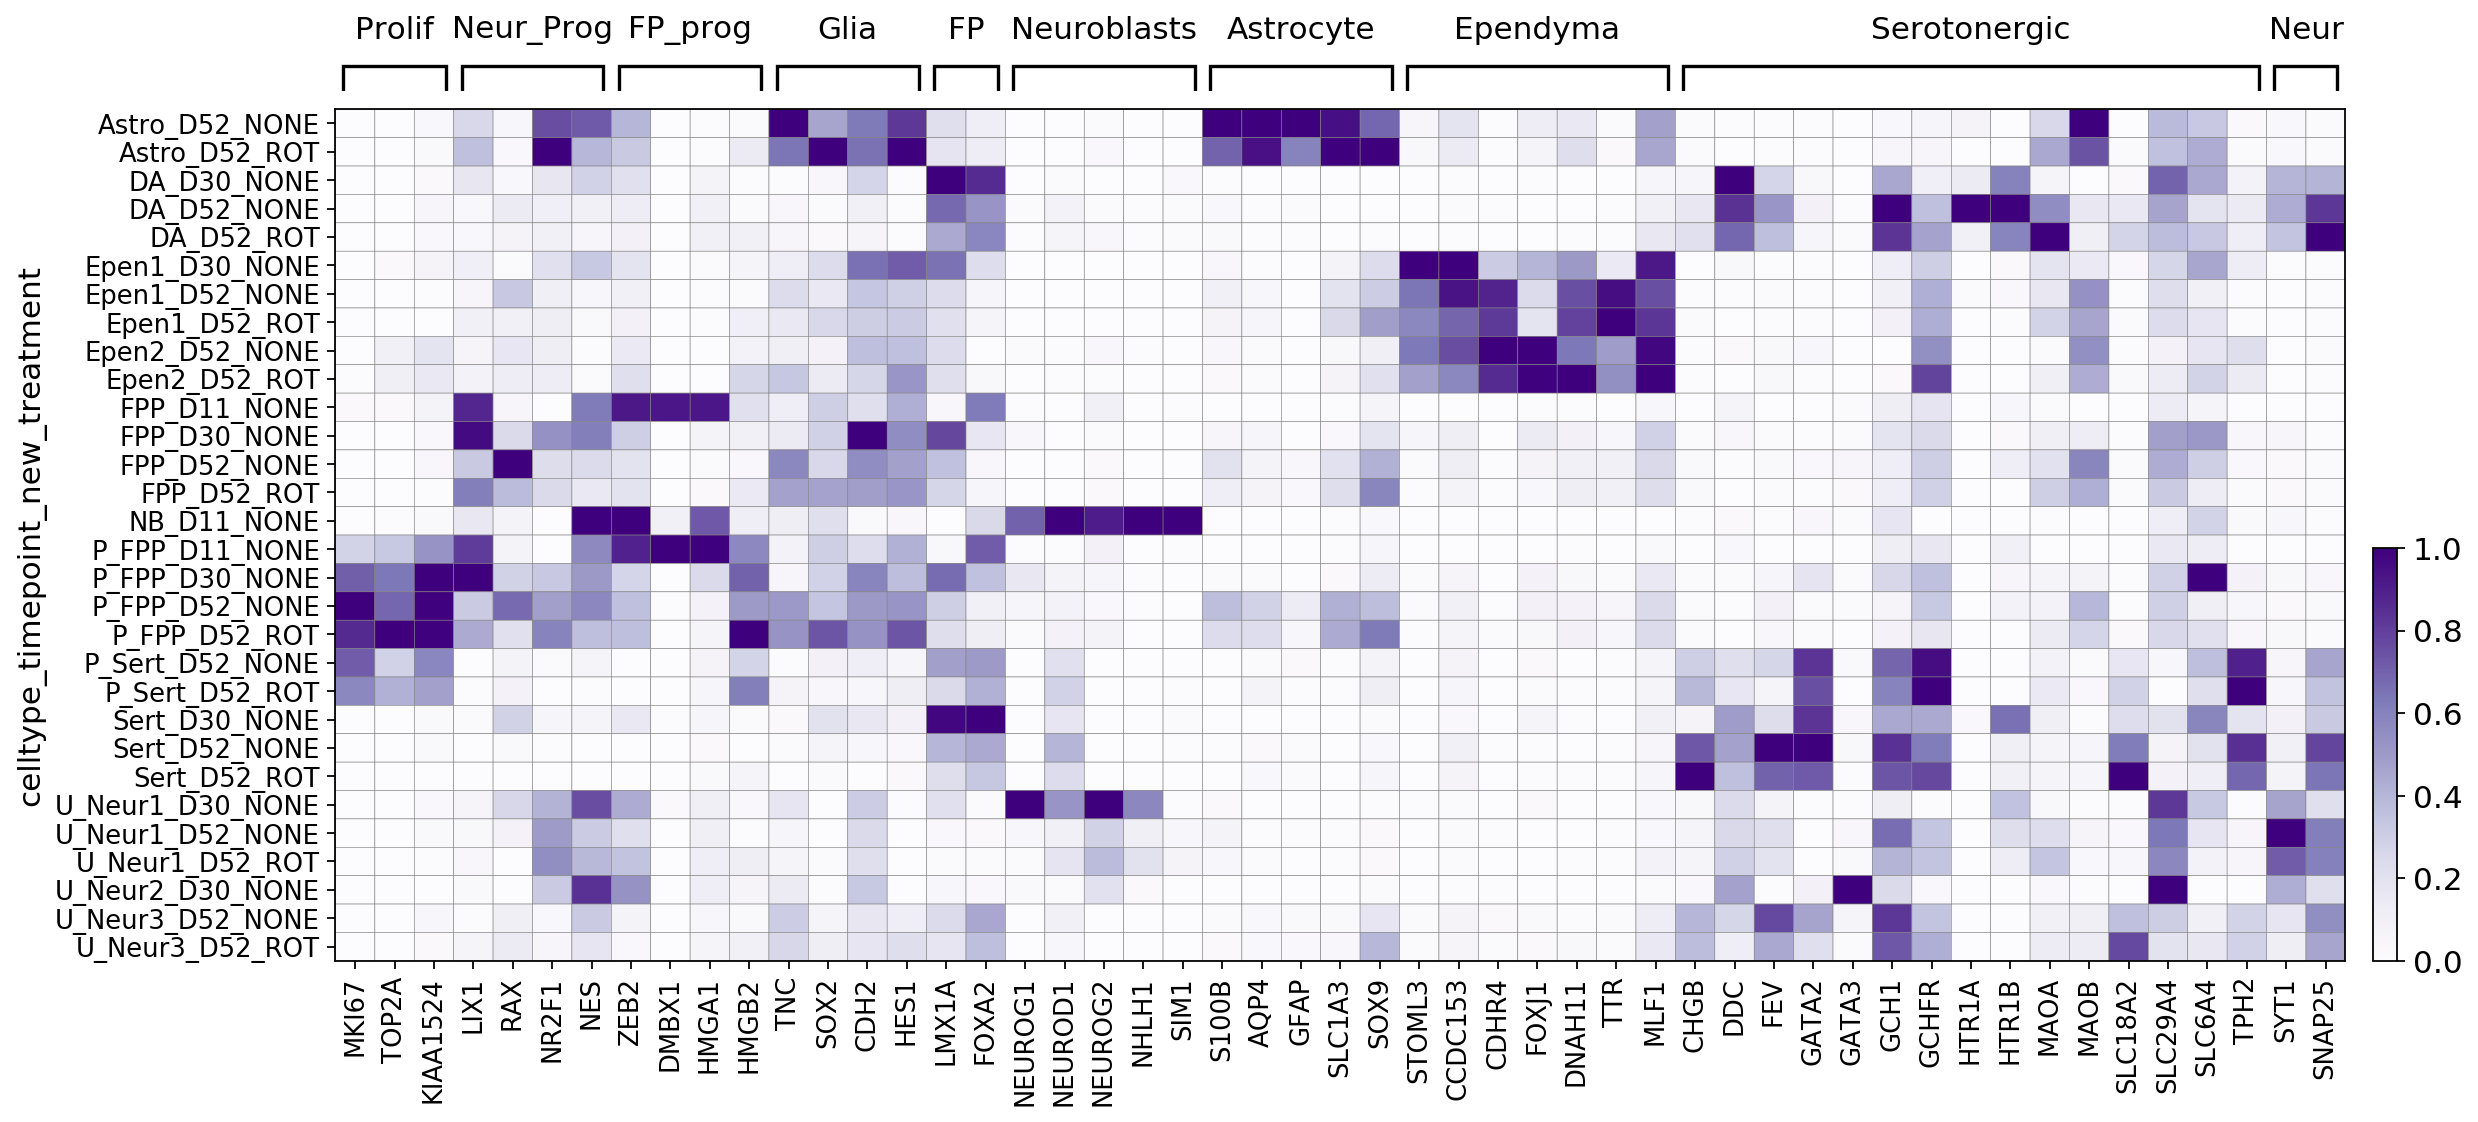

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[16.32, 0, 0.2])

In [29]:
sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint_new_treatment', standard_scale='var', cmap='Purples',
                    var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0, save = "Ext_Fig_1c.pdf")

In [33]:
Dopaminergic=['ABCC8','ACOT7','ALDH1A1','AMER3','ARG2','ASB4','BNC2','CADPS2','CALB1','CALB2','CAMK2N1','CDK14',
                 'CHL1',
#                  'CHMA6','CHMB3',
                 'CHRNA4','CPEB3','DCC','DKK3','DRD2','EBF2','EN1','EN2','EPHA5','ERC2','FGF13','FOXA2','GDAP1',
                 'GFRA1','GRIA3','GRIK3','GRP','ICA1L','IGF1','KCNIP4','KCNJ6','KLHL1','KLHL13','LGI1','LMO3',
                 'LRRC3B','LRRTM2','LSAMP','LY6H','NETO2','NR4A2','NTSR1','PBX1','PRICKLE2','PRKCA','PRL','PRRT4',
                 'PITX3','PTPN5','PTPRO','RET','SCG2','SLC10A4','SLC18A1','SLC18A2','SLC6A3','SNCA','SOX6','TH',
                 'TMCC3','TMEFF2','TMEM255A','TUB','VGF']

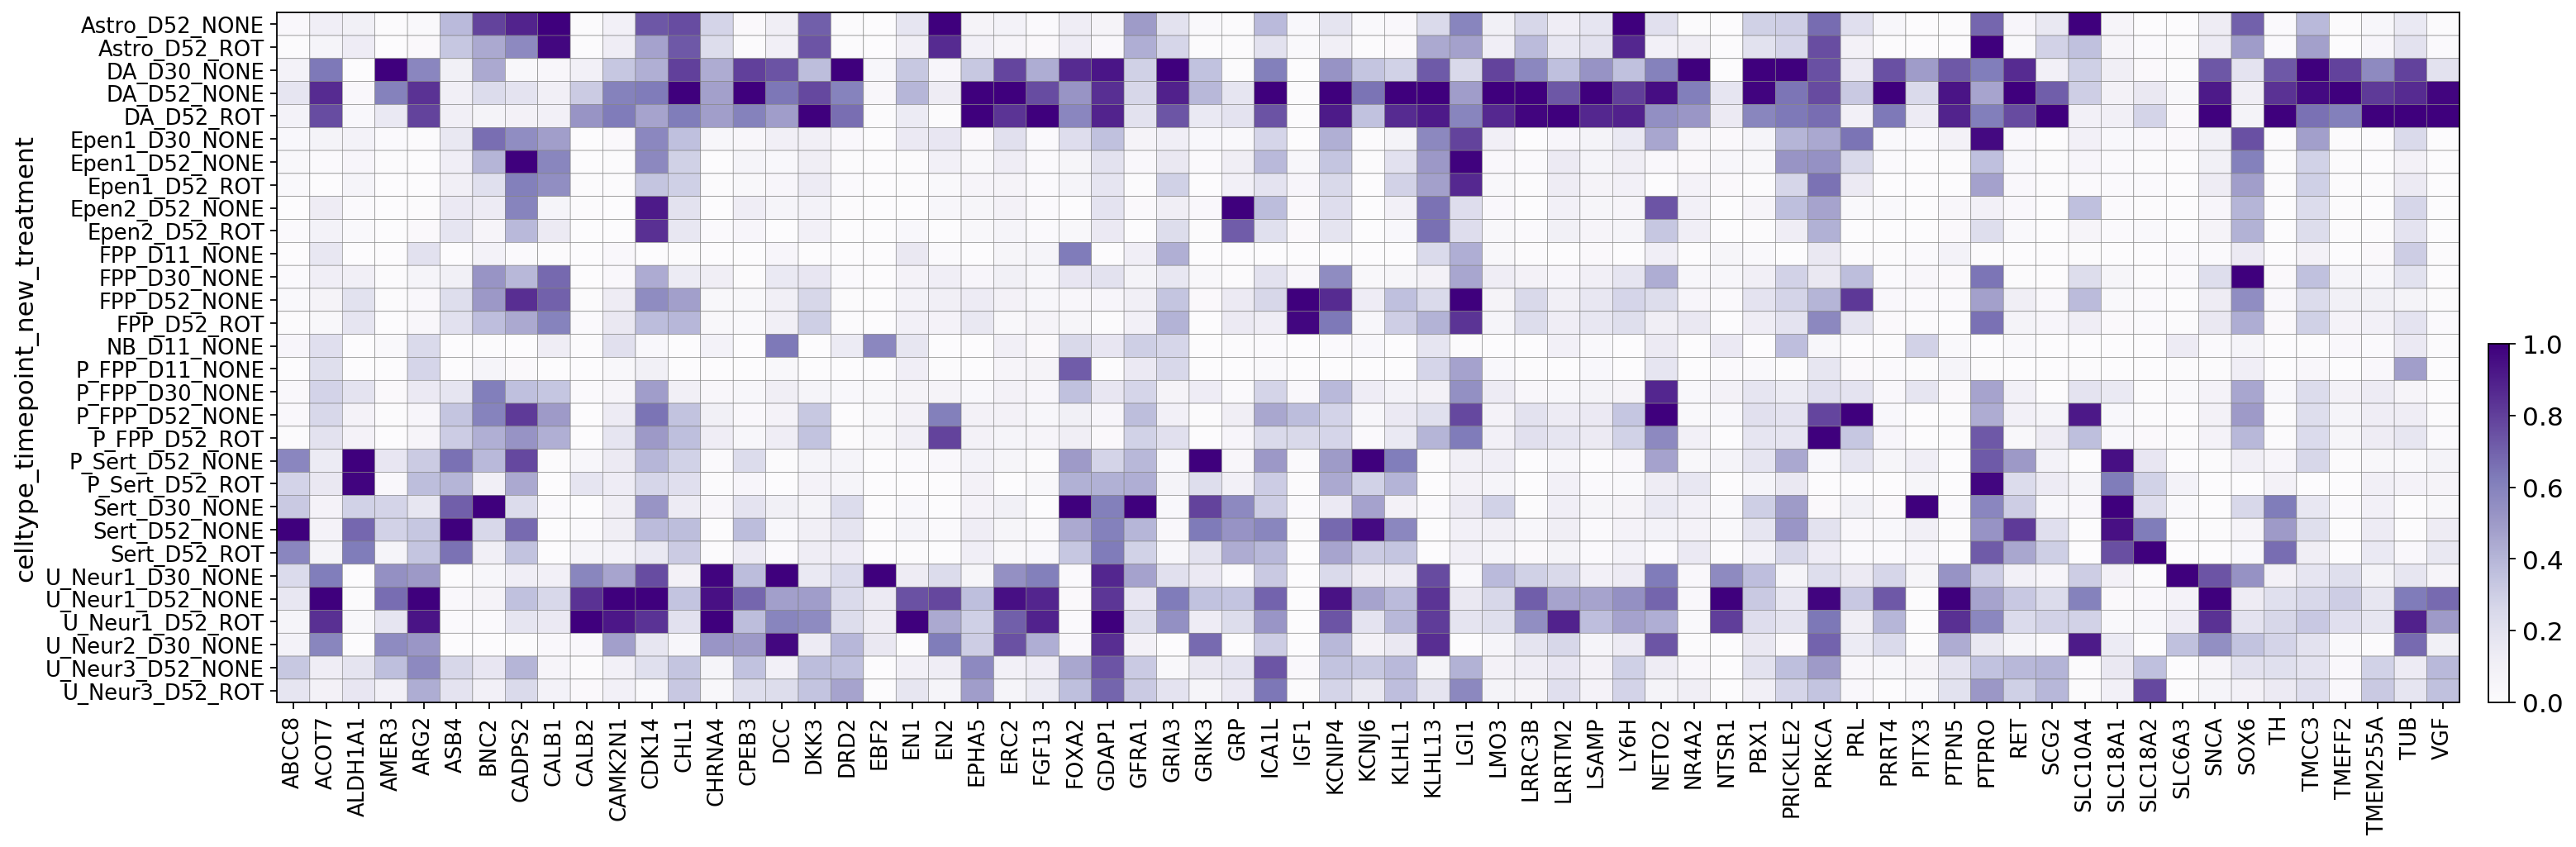

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[21.44, 0, 0.2])

In [34]:
sc.pl.matrixplot(adata, var_names=Dopaminergic,
                     groupby='celltype_timepoint_new_treatment', standard_scale='var', cmap='Purples',                    
                     var_group_rotation=0, save = "Ext_Fig_1d.pdf")

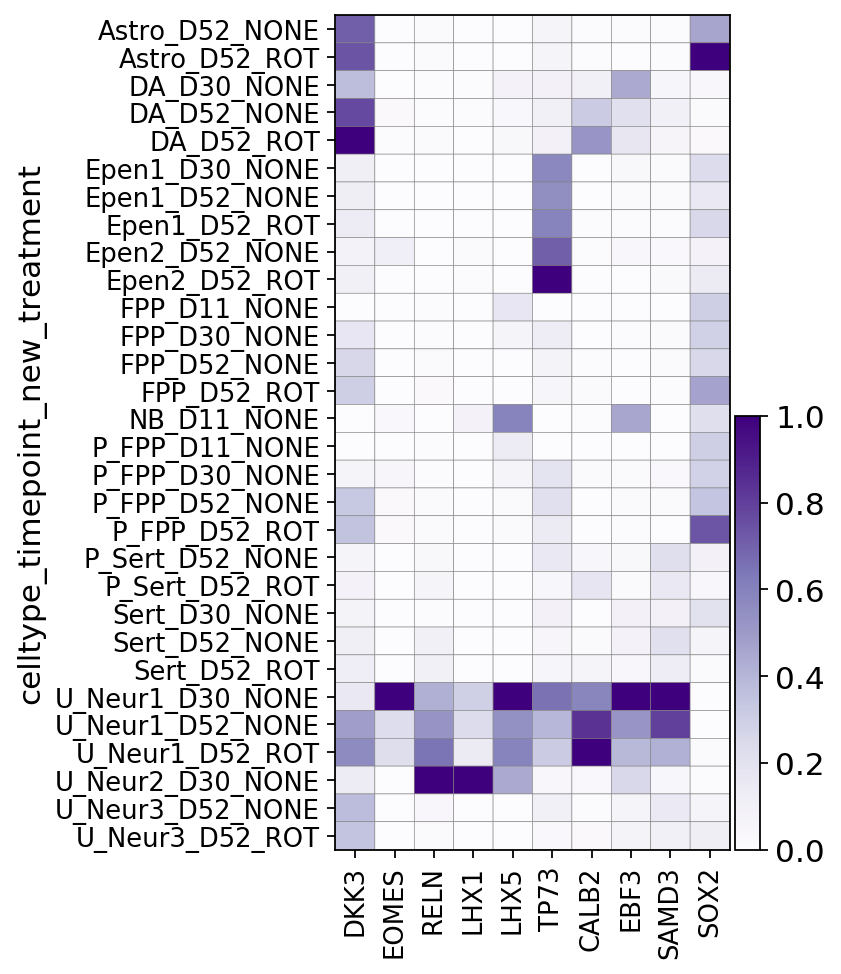

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[3.2, 0, 0.2])

In [35]:
# Cortical Hem
# Loo et al., 2019 (scRNA in mouse)
Cortical_hem=['DKK3','EOMES','RELN','LHX1','LHX5',
#               'TRP73',
              'TP73', # human ortholog
              'CALB2','EBF3','SAMD3','SOX2']

sc.pl.matrixplot(adata, var_names=Cortical_hem,
                     groupby='celltype_timepoint_new_treatment', standard_scale='var', cmap='Purples',                    
                     var_group_rotation=0, save = "Ext_Fig_1e.pdf")